In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import re
import os
import glob
import cv2

In [3]:
import keras


Using TensorFlow backend.


In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Convolution2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

In [5]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [6]:
!ls 

README.md  create_model.ipynb  encode_data.ipynb


In [7]:
DATASET_LOCATION = "/data/English/Hnd/Img/"

In [8]:
img_height = 32
img_width = 32

image_size_flat = img_height*img_width

img_shape = (img_height,img_width)

num_channel = 1# for Gray scale

num_classes = 62 # for 

In [9]:
def create_argmax(folder_name):
    index = int(re.search("Sample(.*)", folder_name).group(1)) - 1
    arr = np.zeros(num_classes)
    arr[index] = 1
    return arr

In [10]:
def cvt_img2np(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (32,32))
    return img

In [11]:
def cvt_img2np2(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape((28,28))

In [12]:
create_argmax("Sample006")

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
def get_dataset():
    DATASET_LOCATION = "/data/English/Hnd/Img/"
    hcr = {"data":[], "labels":[], "cls":[]}
    for folder in glob.glob(DATASET_LOCATION + "/*"):
        if os.path.isdir(folder):
            for img_path in glob.glob(folder + '/*.png'):
                hcr.get('data').append(cvt_img2np(img_path))
                hcr.get("labels").append(create_argmax(folder))
                hcr.get("cls").append(int(folder[-3:]) - 1)
#     print("read completed")
    permutate = np.random.permutation(len(hcr.get('data')))
    return {k1:v1[permutate] for k1, v1 in {k: np.array(v) for k, v in hcr.items()}.items()}

In [14]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == 9 and len(cls_true) == 9
    
    fig, axes = plt.subplots(3,3,figsize=(10,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i], cmap="binary")
        if cls_pred is None:
            xlabel = "True {0}".format(cls_true[i])
        else:
            xlabel = "True {0}, Pred {1}".format(cls_true[i], cls_pred[i])
    
        ax.set_xlabel(xlabel)
    
        ax.set_xticks([])
        ax.set_yticks([])

In [15]:
hcr = get_dataset()

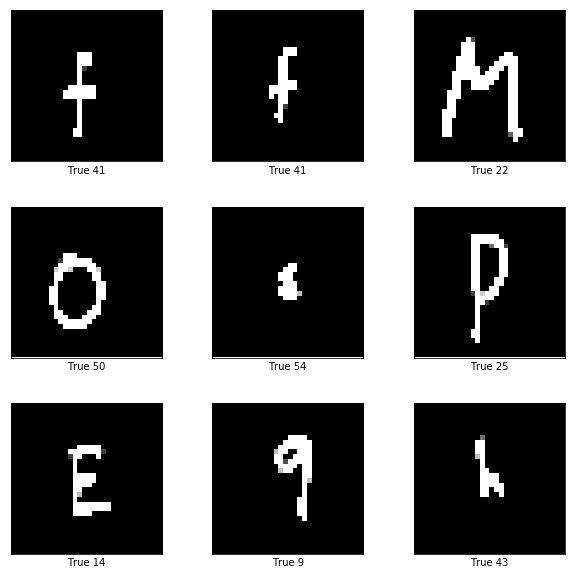

In [16]:
images = hcr.get("data")[3000:3009]
cls_true = hcr.get("cls")[3000:3009]

plot_images(images=images, cls_true=cls_true)

In [ ]:
# hcr = get_dataset()

In [31]:
hcr["labels"][90]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
data = hcr["data"]

In [19]:

data = data.reshape((3410,1,32,32))

# Build Model

In [20]:
data = data.astype("float32")
data = data/255

In [21]:
labels = hcr["labels"]

In [22]:
data.shape

(3410, 1, 32, 32)

In [23]:
filters = 16
kernel_size = (3,3)
batch_size = 32
num_epochs = 5

In [24]:
Convolution2D?

In [74]:
conv_model = Sequential()

conv_model.add(Conv2D(filters, (3,3), padding="same", input_shape=(1,32,32)))
conv_model.add(Activation("relu"))

conv_model.add(Conv2D(filters, kernel_size=(3,3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2,2), dim_ordering="th"))
conv_model.add(Dropout(0.2))

conv_model.add(Conv2D(filters, kernel_size=(3,3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2,2), dim_ordering="th"))
conv_model.add(Dropout(0.2))

conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Activation("relu"))

# conv_model.add(Dropout(0.2))
conv_model.add(Dense(num_classes))
conv_model.add(Activation("softmax"))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  del sys.path[0]


In [75]:
conv_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 1, 32, 16)         4624      
_________________________________________________________________
activation_43 (Activation)   (None, 1, 32, 16)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 32, 16)         2320      
_________________________________________________________________
activation_44 (Activation)   (None, 1, 32, 16)         0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 16, 8)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 16, 8)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 16, 16)         1168      
__________

In [77]:
data = data.reshape((3410,1,32,32))
conv_model.fit(data, hcr["labels"], epochs=25, validation_split=0.15)

Train on 2898 samples, validate on 512 samples
Epoch 1/25
2898/2898 [==============================] - 1s 288us/step - loss: 2.5208 - acc: 0.3043 - val_loss: 2.4535 - val_acc: 0.3262
Epoch 2/25
2898/2898 [==============================] - 1s 271us/step - loss: 2.4704 - acc: 0.3133 - val_loss: 2.3671 - val_acc: 0.3730
Epoch 3/25
2898/2898 [==============================] - 1s 269us/step - loss: 2.4463 - acc: 0.3216 - val_loss: 2.3486 - val_acc: 0.3770
Epoch 4/25
2898/2898 [==============================] - 1s 264us/step - loss: 2.3931 - acc: 0.3309 - val_loss: 2.3510 - val_acc: 0.3574
Epoch 5/25
2898/2898 [==============================] - 1s 260us/step - loss: 2.3621 - acc: 0.3285 - val_loss: 2.3368 - val_acc: 0.3477
Epoch 6/25
2898/2898 [==============================] - 1s 263us/step - loss: 2.3323 - acc: 0.3392 - val_loss: 2.2628 - val_acc: 0.3906
Epoch 7/25
2898/2898 [==============================] - 1s 267us/step - loss: 2.3292 - acc: 0.3371 - val_loss: 2.2724 - val_acc: 0.3672
E

In [33]:
data = data.reshape((3410,1024 ))

In [35]:
data[0]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [44]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Activation("relu"))

model.add(Dense(256, input_shape=(1024,)))
model.add(Activation("relu"))

model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 62)                15934     
_________________________________________________________________
activation_16 (Activation)   (None, 62)                0         
Total params: 672,062
Trainable params: 672,062
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(data, hcr["labels"], validation_split=0.15, epochs=40)

Train on 2898 samples, validate on 512 samples
Epoch 1/40
2898/2898 [==============================] - 1s 365us/step - loss: 2.0498 - acc: 0.4382 - val_loss: 2.5525 - val_acc: 0.3516
Epoch 2/40
2898/2898 [==============================] - 1s 382us/step - loss: 2.0019 - acc: 0.4486 - val_loss: 2.5695 - val_acc: 0.3457
Epoch 3/40
2898/2898 [==============================] - 1s 363us/step - loss: 1.9561 - acc: 0.4517 - val_loss: 2.6323 - val_acc: 0.3340
Epoch 4/40
2898/2898 [==============================] - 1s 369us/step - loss: 1.9598 - acc: 0.4513 - val_loss: 2.5023 - val_acc: 0.3457
Epoch 5/40
2898/2898 [==============================] - 1s 363us/step - loss: 1.8890 - acc: 0.4662 - val_loss: 2.5192 - val_acc: 0.3320
Epoch 6/40
2898/2898 [==============================] - 1s 367us/step - loss: 1.8551 - acc: 0.4769 - val_loss: 2.4500 - val_acc: 0.3750
Epoch 7/40
2898/2898 [==============================] - 1s 370us/step - loss: 1.8654 - acc: 0.4772 - val_loss: 2.4514 - val_acc: 0.3652
E

KeyboardInterrupt: 